In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from numpy.linalg import norm
import random
%matplotlib inline

### Modelo y muestras aleatorias

In [61]:
def f(x):
    '''
    Returns a sample with instances without noise.
    '''
    y = 6*np.sin(x) + np.cos(3*x) + 20 - 0.5*(x-4)**2 + 12*np.exp(-(x-7)**2*14)
    return (y)

def sample(x, f, noise):
    '''
    Returns a sample with 'size' instances.
    '''
    mn = np.min(f(x))
    mx = np.max(f(x))
    y = f(x) + np.random.normal(loc=0, scale=noise*(mx-mn), size=len(x))
    return (y)

Settings:

In [260]:
Xmin = 0
Xmax = 10
Nsamples = 50
noise = 0.1

Text(0, 0.5, 'variable dependiente, Y')

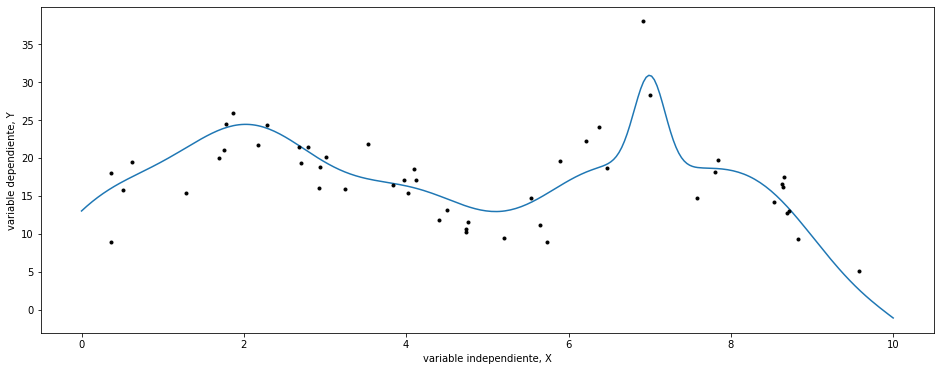

In [288]:
fig = plt.figure(figsize=(16, 6))
ax = fig.add_subplot()

x = np.linspace(Xmin, Xmax, 300)
y = f(x)

ax.plot(x, y)

xs = np.random.uniform(Xmin, Xmax, Nsamples)
ys = sample(xs, f, noise)

ax.plot(xs, ys, 'k.')
ax.set_xlabel('variable independiente, X'); ax.set_ylabel('variable dependiente, Y')

### Ajuste de modelos anidados

In [262]:
def fit_polynomial(x, y, degree):
    '''
    Fits a polynomial to the input sample.
    (x,y): input sample
    degree: polynomial degree
    '''
    model = LinearRegression()
    model.fit(np.vander(x, degree + 1), y)
    return model

def apply_polynomial(model, x):
    '''
    Evaluates a linear regression model in an input sample
    model: linear regression model
    x: input sample
    '''
    degree = model.coef_.size - 1
    y = model.predict(np.vander(x, degree + 1))
    return y

Text(0, 0.5, 'variable dependiente, Y')

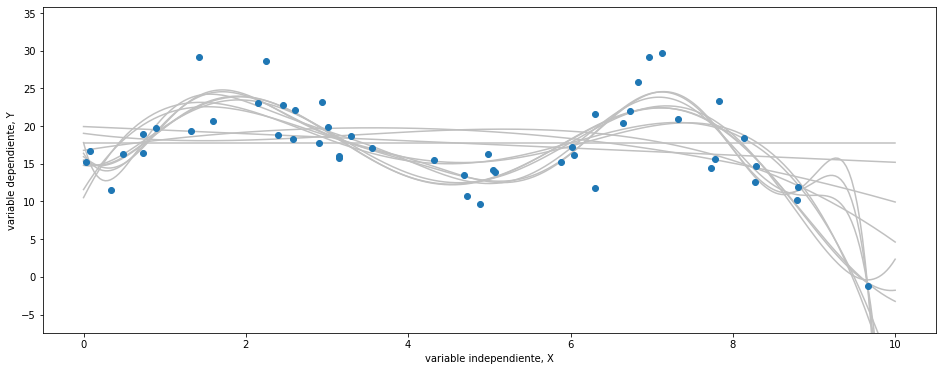

In [263]:
fig = plt.figure(figsize=(16, 6))
ax = fig.add_subplot()

for i in range(12):
    model = fit_polynomial(xs, ys, i)
    p_y = apply_polynomial(model, x)

    ax.plot(x, p_y, color='silver')

ax.plot(xs, ys, "o")
ax.set_ylim(min(ys)-2*noise*(max(ys)-min(ys)), max(ys)+2*noise*(max(ys)-min(ys)))
ax.set_xlabel('variable independiente, X'); ax.set_ylabel('variable dependiente, Y')

### Promedio de ajustes

In [266]:
degree = 14
n_samples = 60
n_models = 20

Text(0, 0.5, 'variable dependiente, Y')

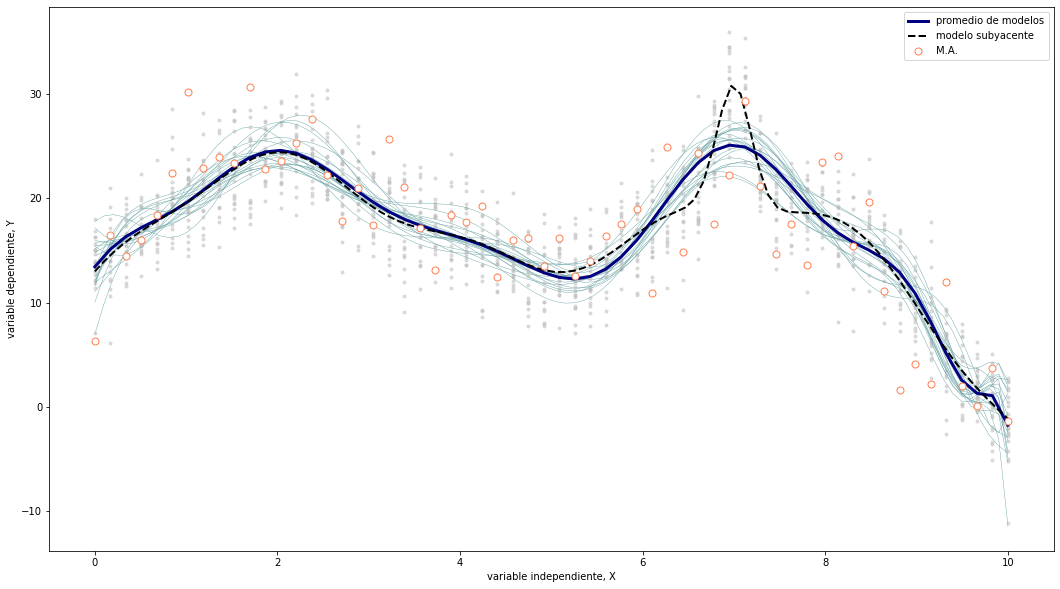

In [267]:
fig = plt.figure(figsize=(18, 10))
ax = fig.add_subplot()

xd = np.linspace(Xmin, Xmax, 100)
xs = np.linspace(Xmin, Xmax, n_samples)

avg_y = np.zeros(n_samples)
for i in np.arange(n_models):
    ys = sample(xs, f, noise)
    model = fit_polynomial(xs, ys, degree)
    p_y = apply_polynomial(model, xs)
    avg_y = avg_y + p_y
    p_y = apply_polynomial(model, xd)
    ax.plot(xd, p_y, color='cadetblue', lw=0.4)
    ax.plot(xs, ys, marker='.', color='silver', linestyle='None', alpha=0.5)
avg_y = avg_y / n_models

ys = sample(xs, f, noise)

ax.plot(xs, avg_y, color='navy',lw=3, label='promedio de modelos')
ax.plot(xd, f(xd), 'k--', lw=2, label='modelo subyacente')
ax.plot(xs, ys, marker='o', mfc='white', mec='coral', markersize=7, linestyle='None', label='M.A.')
ax.legend()
ax.set_xlabel('variable independiente, X'); ax.set_ylabel('variable dependiente, Y')

### Sesgo y varianza teóricos
Vamos a hacer una estimacion de la varianza y del sesgo

In [268]:
Nsamples = 50
n_models = 100
max_degree = 15
noise = 0.1

xs = np.linspace(0, Xmax, Nsamples)
yt = f(xs)

BIAS2 = []
VARIANCE = []

In [269]:
for degree in range(1, max_degree):
    
    avg_y = np.zeros(Nsamples)
    models = []
    for i in np.arange(n_models):        
        ys = sample(xs, f, noise)
        model = fit_polynomial(xs, ys, degree)
        p_y = apply_polynomial(model, xs)        
        avg_y = avg_y + p_y
        models.append(p_y)
    avg_y = avg_y / n_models
    
    BIAS2.append(norm(avg_y - yt)**2)
    
    variance = 0
    for p_y in models:
        variance += norm(avg_y - p_y)
    variance / ys.size * n_models
    VARIANCE.append(variance)    

In [270]:
print(len(BIAS2), len(VARIANCE), max_degree)

14 14 15


In [271]:
ERROR = np.array(BIAS2) + np.array(VARIANCE)  # falta la varianza del ruido, que es constante

In [272]:
print(len(BIAS2), len(VARIANCE), max_degree, len(ERROR))

14 14 15 14


Text(0, 0.5, 'ERROR')

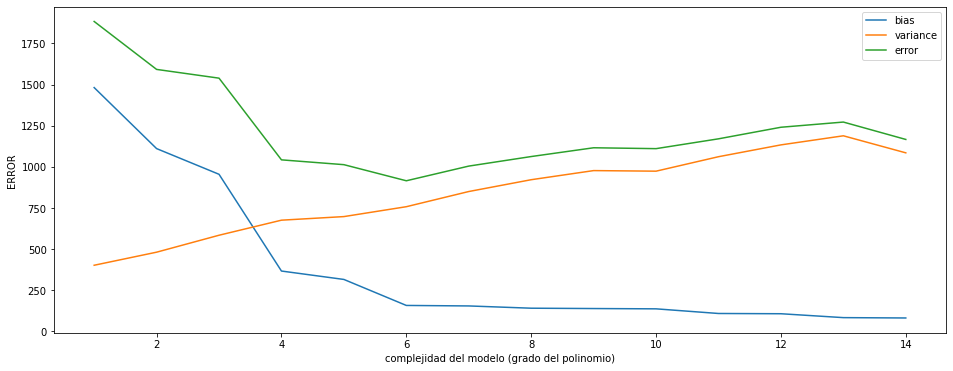

In [273]:
fig = plt.figure(figsize=(16, 6))
ax = fig.add_subplot()

ax.plot(range(1, max_degree), BIAS2, label='bias')
ax.plot(range(1, max_degree), VARIANCE, label='variance')
ax.plot(range(1, max_degree), ERROR, label='error')
ax.legend()
ax.set_xlabel('complejidad del modelo (grado del polinomio)'); ax.set_ylabel('ERROR')

### Validación cruzada

En la vida real no tenemos la función, la idea es que tenemos una muestra, de la cual separamos dos submuestras, una de entrenamiento y una de validación.

In [274]:
n_samples = 30
n_train = 15

# simulamos una muestra:
x_all = np.linspace(0, Xmax, n_samples)
y_all = sample(x_all, f, 0.15)

# muestras de entrenamiento y validacion:
ids = random.sample(range(n_samples), n_train)

x_train = [x_all[k] for k in range(len(x_all)) if k in ids]
y_train = [y_all[k] for k in range(len(x_all)) if k in ids]

x_test = [x_all[k] for k in range(len(x_all)) if k not in ids]
y_test = [y_all[k] for k in range(len(x_all)) if k not in ids]

Text(0, 0.5, 'Y')

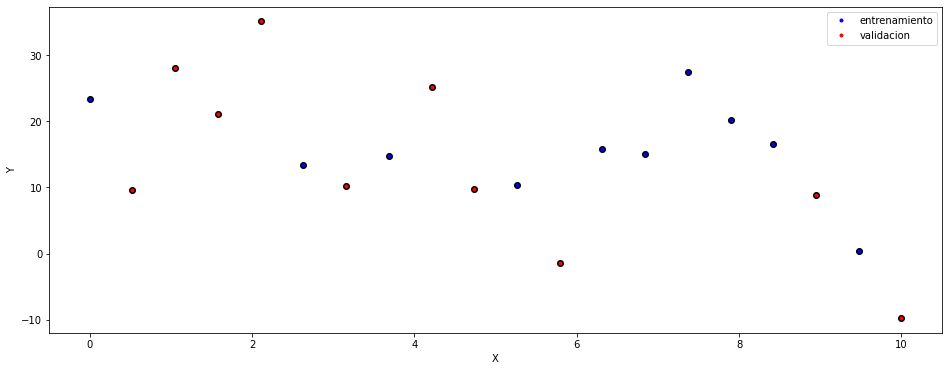

In [287]:
fig = plt.figure(figsize=(16, 6))
ax = fig.add_subplot()

ax.plot(x_all, y_all, "ok")
ax.plot(x_train, y_train, ".b", label='entrenamiento')
ax.plot(x_test, y_test, ".r", label='validacion')
ax.legend()
ax.set_xlabel('X'); ax.set_ylabel('Y')

In [301]:
max_degree = 10

test_error_vals = []
train_error_vals = []

for degree in np.arange(1, max_degree):
    
    model = fit_polynomial(x_train, y_train, degree)
    
    y_model = apply_polynomial(model, x_train)
    #train_error_vals.append(norm(y_train - y_model)**2)
    train_error_vals.append(np.dot(y_train - y_model, y_train - y_model))
    
    y_model = apply_polynomial(model, x_test)
    #test_error_vals.append(norm(y_test - y_model)**2)
    test_error_vals.append(np.dot(y_test - y_model, y_test - y_model))

In [302]:
train_error_vals

[475.9414024519555,
 159.78687561031205,
 142.11539278473592,
 138.64051038155728,
 135.29737904875498,
 132.14930758852717,
 94.78279146452758,
 89.64907870141406,
 6.424029018799907e-15]

In [304]:
test_error_vals

[1577.9563766077233,
 1037.7326200180887,
 816.6158072679011,
 825.8732140013452,
 1428.9208821780521,
 2466.341786276853,
 1260332.565406973,
 8134766.633752632,
 2751426920.343227]

### TAREA:

- Graficar el error de prueba para distintas divisiones aleatorias de las muestras de entrenamiento y validación.
- Graficar el error de prueba para distintas muestras haciendo validación cruzada de 10 capas